# Ejercicio 1
Encuentre la solucion óptima al siguiente problema.

$ maxf(x) = \frac{0.5}{\sqrt{1 + x^2} } - \sqrt{1 + x^2} (1 - \frac{0.5}{1 + x^2}) + x$

In [6]:
def f(x):
  return (0.5/(1+x**2)**(1/2)) - (1+x**2)**(1/2) * (1- (0.5/(1+x**2))) + x

#a)
utilizando el método de estimaciones cuadraticas sucesivas, la entrada es $x0 = 0, \delta = 0.1 y \epsilon = 0.0001$

In [19]:
def obtener_a(x1,x2,x3):
    global f_guardadas
    #print (x1,x2,x3)
    f1,f2,f3 = [f_guardadas[_] for _ in [x1,x2,x3] ]
    a0 = f1
    a1 = (f2-f1) / (x2-x1)
    a2 = (1/(x3-x2)) * ( ((f3-f1)/(x3-x1)) - a1 )
    return(a0,a1,a2)

def actualizar_f_guardadas(x1,x2,x3):
  global f_guardadas
  for _ in f_guardadas.keys():
    if _ not in [x1,x2,x3]:
      eliminar = _
  f_guardadas.pop(eliminar)

def consultarf(x):
  try:
    return(f_guardadas[x])
  except:
    f_guardadas[x] = f(x)
    return(f_guardadas[x])

def obtener_xb(x1,x2,a1,a2):
  return( (x1+x2)/2 - a1/(2*a2) )

def estimaciones(x1,delta,epsilon,f):
    global c, f_guardadas
    c=0
    f_guardadas = {}
    f_guardadas[x1] = f(x1)
    x2 = x1 + delta
    f_guardadas[x2] = f(x2)
    if f_guardadas[x1] > f_guardadas[x2] :
      x3 = x1+2*delta
    else:
      x3 = x1 - delta
    f_guardadas[x3] = f(x3)
    x1,x2,x3 = sorted([x1,x2,x3])
    a0,a1,a2 = obtener_a(x1,x2,x3)
    xb = obtener_xb(x1,x2,a1,a2)
    xmin  = x1
    fmin = f_guardadas[xmin]
    gg=0
    while abs(xmin - xb) > epsilon:
      gg+=1
      f_guardadas[xb] = f(xb)
      x1,x2,x3 = [list(f_guardadas.keys())[list(f_guardadas.values()).index(_)] 
                  for _ in sorted(f_guardadas.values())[0:3]] #obtiene las mejores x1,x2,x3 en base a sus f
      x1,x2,x3 = sorted([x1,x2,x3])
      #actualizar_f_guardadas(x1,x2,x3) # borramos el valor de la funcion en el punto que ya no se usa
      a0,a1,a2 = obtener_a(x1,x2,x3)
      xb = obtener_xb(x1,x2,a1,a2)
      if f_guardadas[x1] < fmin:
        xmin = x1
        fmin = f_guardadas[x1]
      #print(xmin,consultarf(xmin))

    print('({:.3f}, {:.3f}) \n{}'.format(xmin,-consultarf(xmin),c-1))

In [96]:
def g(x):
  global c
  c+=1
  return(-f(x))

In [97]:
x0, delta,epsilon = 0,0.1,0.0001
estimaciones(x0,delta,epsilon,g)

(0.786, 0.300) 
12


El valor de $x^*$ es $0.786$, la $f(x^*) = -0.300$ y el numero de evaluaciones a $f(x)$ fue 12

#b)
Utilizando el método de Newton-Raphson.

La entrada será $x0  = 0$ y $\epsilon = 0.0001$

## Calculando la primer derivada.
$f(x) = \frac{0.5}{\sqrt{1 + x^2} } - \sqrt{1 + x^2} \left( 1 - \frac{0.5}{1 + x^2}\right) + x$

$f'(x) = \frac{d}{dx}\frac{0.5}{\sqrt{1 + x^2} } - \frac{d}{dx}\sqrt{1 + x^2} \left( 1 - \frac{0.5}{1 + x^2} \right) + \frac{d}{dx}x $

calculamos la derivada por partes.

$\frac{d}{dx}\frac{0.5}{\sqrt{1 + x^2} }$

$\frac{0.5}{\sqrt{1 + x^2} } =  \frac{\frac{1}{2}}{\sqrt{1 + x^2}} = \frac{1}{2\sqrt{1 + x^2}}$

$\frac{d}{dx} \frac{1}{2\sqrt{1 + x^2}} = - \frac{\frac{d}{dx} \left( 2\sqrt{1 + x^2} \right)}{ \left( 2*\sqrt{1 + x^2} \right)^2 } = -\frac{2\frac{d}{dx} \left( \sqrt{1 + x^2} \right)}{ \left( 2\sqrt{1 + x^2} \right)^2 } = -\frac{2\frac{d}{dx} \left( \sqrt{1 + x^2} \right)}{ \left( 2\sqrt{1 + x^2} \right)^2 } $

Usamos la regla de la cadena, consideramos $f(x) = \sqrt{x}$ y $g(x) = x^2 + 1$


$= -\frac{2*\frac{d}{dg} \left( \sqrt{g} \right)  * \frac{d}{dx}(x ^2+1)} { \left( 2\sqrt{1 + x^2} \right)^2 } =- \frac{2*  \frac{1}{2\sqrt{g}}   * 2x} { \left( 2\sqrt{1 + x^2} \right)^2 }  = - \frac{2*  \frac{1}{2\sqrt{1+x^2}}   * 2x} { \left( 2\sqrt{1 + x^2} \right)^2 }   = - \frac{\frac{1}{\sqrt{1+x^2}}   * 2x} {  4(1 + x^2)  } = -\frac{\frac{1}{\sqrt{1+x^2}}   *x} {  2(1 + x^2)   } $

$=- \frac{\frac{x}{\sqrt{1+x^2}} } {  2(1 + x^2)  } = - \frac{x}{2(1 + x^2) *\sqrt{1 + x^2}} = - \frac{x}{2(1 + x^2)^{3/2}}$



calculaos la siguiente parte.

$\frac{d}{dx}\sqrt{1 + x^2} \left( 1 - \frac{0.5}{1 + x^2} \right)$

$\sqrt{1 + x^2} \left( 1 - \frac{0.5}{1 + x^2} \right) = \sqrt{1 + x^2} \left( 1 - \frac{1}{2(1 + x^2)} \right) = \sqrt{1 + x^2} \left( \frac{2(1 + x^2) - 1}{2(1 + x^2)} \right) = \sqrt{1 + x^2} \left( \frac{2x^2 + 1 }{2(1 + x^2)} \right)  = \frac{\sqrt{x^2+1}  (2x^2 + 1) }{ 2x^2 + 2} $

usamos la regla de la derivada de una division.
$\frac{d}{dx}\frac{\sqrt{x^2+1}  (2x^2 + 1) }{ 2x^2 + 2} = \frac{ \frac{d}{dx}\sqrt{x^2+1}  (2x^2 + 1) * (2x^2+2) - \sqrt{x^2+1}  (2x^2 + 1) * \frac{d}{dx}(2x^2+2) }{(2x^2 + 2)^2}$

resolvemos $ \frac{d}{dx}\sqrt{x^2+1}  (2x^2 + 1) $

$ = \frac{d}{dx}\sqrt{x^2 +1} * (2x^2 + 1) + \sqrt{x^2 + 1} * \frac{d}{dx}(2x^2+1)$

$= \frac{1}{2\sqrt{x^2+1}} * 2x  *  (2x^2 + 1)+ \sqrt{x^2 + 1} * 4x$

resolvemos $\frac{d}{dx}(2x^2+2) $
$= 4x =$

reemplazamos en la expresion original.

$\frac{ \left(\frac{1}{2\sqrt{x^2+1}} * 2x  *  (2x^2 + 1)+ \sqrt{x^2 + 1}  * 4x\right) * (2x^2+2) - \sqrt{x^2+1}  (2x^2 + 1) * 4x}{(2x^2 + 2)^2}$

$ \frac{ \left(\frac{1}{\sqrt{x^2+1}} * x  *  (2x^2 + 1)+ 4x\sqrt{x^2 + 1} \right) * (2x^2+2) - 4x\sqrt{x^2+1}  (2x^2 + 1) }{(2x^2 + 2)^2} $

$ \frac{ \left(\frac{2x^3+x}{\sqrt{x^2+1}} + 4x\sqrt{x^2 + 1} \right) * (2x^2+2) - 4x\sqrt{x^2+1}  (2x^2 + 1) }{(2x^2 + 2)^2} $

$ \frac{ \left(\frac{2x^3+x + 4x*(x^2+1)}{\sqrt{x^2+1}}  \right) * (2x^2+2) - 4x\sqrt{x^2+1}  (2x^2 + 1) }{(2x^2 + 2)^2} $

$ \frac{ \left(\frac{6x^3 +5x}{\sqrt{x^2+1}}  \right) * (2x^2+2) - 4x\sqrt{x^2+1}  (2x^2 + 1) }{(2x^2 + 2)^2} $

$ \frac{ \left(\frac{12x^5 +22x^3+10x}{\sqrt{x^2+1}}  \right)  - 4x\sqrt{x^2+1}  (2x^2 + 1) }{(2x^2 + 2)^2} $

$ \frac{ \left(\frac{12x^5 +22x^3+10x - 4x(x^2+1)  (2x^2 + 1)}{\sqrt{x^2+1}}  \right)   }{(2x^2 + 2)^2} $

$ \frac{ \left(\frac{12x^5 +22x^3+10x -8x^5 -12x^3-4x}{\sqrt{x^2+1}}  \right)   }{(2x^2 + 2)^2} $

$ \frac{ \frac{4x^5 +10x^3 +6x}{\sqrt{x^2+1}}   }{(2x^2 + 2)^2} $

$ \frac{ 4x^5 +10x^3 +6x  }{\sqrt{x^2+1}(2x^2 + 2)^2} $

juntamos las partes

$- \frac{x}{2(1 + x^2)^{3/2}} - \frac{ 4x^5 +10x^3 +6x  }{\sqrt{x^2+1}*(2*(x^2 + 2))^2} + 1$

$- \frac{x}{2(1 + x^2)^{3/2}} - \frac{ 2x *(2x^4 +5x^2 +3)  }{\sqrt{1+x^2}*2^2*(1+x^2)^2} + 1$

$- \frac{x}{2(1 + x^2)^{3/2}} - \frac{ x *(2x^4 +5x^2 +3)  }{\sqrt{1+x^2}*2*(1+x^2)^2} + 1$

$- \frac{x}{2(1 + x^2)^{3/2}} - \frac{ x *(2x^4 +3x^2+2x^2 +3)  }{\sqrt{1+x^2}*2*(1+x^2)^2} + 1$

$- \frac{x}{2(1 + x^2)^{3/2}} - \frac{ x * (x^2* (2x^2 +3x)+2x^2 +3)  }{\sqrt{1+x^2}*2*(1+x^2)^2} + 1$

$- \frac{x}{2(1 + x^2)^{3/2}} - \frac{ x *(2x^2 +3)*(x^2 +1)  }{\sqrt{1+x^2}*2*(1+x^2)^2} + 1$

$- \frac{x}{2(1 + x^2)^{3/2}} - \frac{ x *(2x^2 +3)  }{\sqrt{1+x^2}*2*(1+x^2)} + 1$

$- \frac{x}{2(1 + x^2)^{3/2}} - \frac{2x^ +3x  }{2(1 + x^2)^{3/2}} + 1$

$- \frac{x + 2x^3+3x}{2(1 + x^2)^{3/2}}  + 1$

$- \frac{2x^3+4x}{2(1 + x^2)^{3/2}}  + 1$

$- \frac{2*(x^3+2x)}{2(1 + x^2)^{3/2}}  + 1$

$ \frac{-x^3-2x}{(1 + x^2)^{3/2}}  + 1$ es el valor de la primer derivada.

#calcular la segunda derivada
$\frac{d}{dx} \frac{-x^3-2x}{(1 + x^2)^{3/2}}  + 1 = \frac{d}{dx} \frac{-x^3-2x}{(1 + x^2)^{3/2}} + 0$

usamos la regla de la derivada de un cociente.

$ \frac{d}{dx} -\frac{x^3+2x}{(1 + x^2)^{3/2}} =  -\frac{\frac{d}{dx}(x^3+2x) * (1+2x)^{3/2} -  (x^3+2x) * \frac{d}{dx}(1+2x)^{3/2}  }{ \left((1 + x^2)^{3/2}\right)^2}$

$  = -\frac{(3x^2+2) * (1+2x)^{3/2} -  (x^3+2x) * \frac{3}{2}*(1+2x)^{1/2}*2x  }{ \left((1 + x^2)^{3/2}\right)^2}$

$  = -\frac{(3x^2+2) * (1+2x)^{3/2} -  (x^3+2x) * 3x*(1+2x)^{1/2}  }{ (1 + x^2)^3}$

$  =-\frac{(3x^2+2) * (1+2x)^{3/2} -  (3x^4+6x^2) * (1+2x)^{1/2}  }{ (1 + x^2)^3}$

$  =- \frac{ (1+2x)^{1/2} * ((3x^2+2)* (1+2^2) - 3x^4-6x^2) }{ (1 + x^2)^3}$

$  =- \frac{ (1+2x)^{1/2} * (3x^2+2 +3x^4+2x^2 - 3x^4-6x^2) }{ (1 + x^2)^3}$

$  =- \frac{  3x^2+2 +3x^4+2x^2 - 3x^4-6x^2 }{ (1 + x^2)^{5/2}}$

$  = \frac{  x^2 - 2 }{ (1 + x^2)^{5/2}}$

como los metodos asumen minimizacion, devolvemos el negativo para que maximicen, ademas se cuentan las llamadas en la derivada primera, asi que hare una nueva g(x) que no sume al contador

In [87]:
def f1(x):
  global c
  c+=1
  return (
      -(((-(x**3) - 2*x) / ((1+x**2)**(3/2)) ) +1)
  )

In [88]:
def f2(x):
  return(
      -((x**2 - 2) / ((1+x**2)**(5/2)))
  )

In [89]:
def g(x):
  return(-f(x))

In [90]:
x0,epsilon = 0,0.0001

In [91]:
def Raphson(x1,epsilon,f):
  global c
  c= 0
  f1x = f1(x1)
  while abs(f1x) > epsilon:  
    x2 = x1 - (f1x/f2(x1))
    x1 = x2
    f1x = f1(x1)
  print('({:.3f},{:.3f})\n{}'.format(x1,-f(x1),c))

In [94]:
Raphson(x0,epsilon,g)

(0.786,0.300)
6


El valor de $x^*$ es $0.786$, la $f(x^*)$ es $0.300$ y se llamó a la derivada de la funcion 6 veces.

#c)
Utilizando el método de Casi Newton. La entrada será $x0 = 0, \epsilon = 0.0001$ y $\delta = 0.01$

In [81]:
def f_1(x : float, delta : float):
  return ( 
    (cf(x+delta) - cf(x-delta)) / (2*delta)
  )

def f_2(x : float,delta : float):
  #print("fx+",f(x+delta),"fx",f(x),"fx-",f(x-delta))
  return(
   (cf(x+delta) - (2*cf(x)) + cf(x-delta)) / (delta**2)
  )

def cf(x):
  global valores_f
  try:
    return(valores_f[x])
  except:
    valores_f[x] = f(x)
    return(valores_f[x])

def Cuasi_Newton(x0 :float, epsilon : float, delta : float):
  global c,valores_f
  valores_f = {}
  c= 0
  x1 = x0
  valores_f[x1] = f(x1)
  f_1x = f_1(x1,delta)

  while abs(f_1x) > epsilon:  
    #print(x1,f_2(x1,delta))
    x2 = x1 - (f_1x/f_2(x1,delta))
    x1 = x2
    f_1x = f_1(x1,delta)
  print('({:.3f},{:.3f})\n{}'.format(x1,-f(x1),c))

como se deben contar las llamadas a $f(x)$, la cambiaré para que cuente cuando la llaman, y que devuelva el negativo para que el método maximice

In [82]:
def f(x):
  global c
  c+=1
  return -((0.5/(1+x**2)**(1/2)) - (1+x**2)**(1/2) * (1- (0.5/(1+x**2))) + x)

In [83]:
x0,epsilon,delta = 0,0.0001,0.01

In [84]:
Cuasi_Newton(x0,epsilon,delta)

(0.786,0.300)
18


el punto $x^*$ salio de $0.786$, la $f(x^*) = 0.300$ 

#d)
Utilizando el método de bisección. La entrada a
su programa será: $a=0, b = 5$ y $\epsilon = 0.0001$

In [98]:
def f(x):
  return -((0.5/(1+x**2)**(1/2)) - (1+x**2)**(1/2) * (1- (0.5/(1+x**2))) + x)
def f1(x):
  global c
  c+=1
  return (
      -(((-(x**3) - 2*x) / ((1+x**2)**(3/2)) ) +1)
  )

In [111]:
def biseccion(a : float, b : float,epsilon: float):
  global c
  c =0
  if f1(a) <= 0 and f1(b) >= 0:
      z = (a+b) /2
      f1z = f1(z)
      while abs(f1z) > epsilon:
        #print(f_1z)
        if f1z < 0:
          a = z
        else:
          b = z
        z = (a+b) /2
        f1z = f1(z)
      print('({:.3f},{:.3f})\n{}'.format(z,-f(z),c))
  else:
    print('Error')

In [112]:
a,b,epsilon = 0,5,0.0001

In [113]:
biseccion(a,b,epsilon)

(0.786,0.300)
12


El punto $x^*$ me salio igual a $0.786$, la $f(x^*)$ = $0.300$, y se llamó a la derivada de la función 12 veces.

#e)
Utilizando el método de la secante, con entrada de $a=0,b=5 y \epsilon=0.0001$

Como se debe contar igual que en el inciso anterior, no necesito declarar nuevamente la $f(x)$ ni la $f'(x)$

In [22]:
def cf1(x):
  global valores_f1
  try:
    return( valores_f1[x])
  except:
    valores_f1[x] = f1(x)
    return( valores_f1[x])

def secante(x_l : float,x_r : float,epsilon: float):
  global c, valores_f1
  valores_f1 = {}
  c  = 0
  f1xr=cf1(x_r)
  f1xl=cf1(x_l)
  z = ( x_r - ( (f1xr * (x_r-x_l)) / (f1xr - f1xl) ) )
  f1z  = cf1(z)
  if  (cf1(x_l) * cf1(x_r)) > 0:
      print('Error')
      exit()
  while abs(f1z) > epsilon:
    #print(z)    
    if  (cf1(x_l) * cf1(x_r)) > 0:
      print('Error')
      break
    if f1z < 0:
      x_l = z
      f1xl = f1z
    else:
      x_r  =z
      f1xr = f1z
    z = ( x_r - ( (f1xr * (x_r-x_l)) / (f1xr - f1xl) ) )
    f1z  = cf1(z)
    
  print('({:.3f},{:.3f})\n{}'.format(z,-f(z),c))

In [119]:
a,b,epsilon = 0,5,0.0001
secante(a,b,epsilon)

(0.786,0.300)
56


El punto $x^*$ me salio igual a $0.786$, la $f(x^*)$ = $0.300$, y se llamó a la derivada de la función 56 veces.

# Ejercicio 2
Grafica la función $f(x)$ en el intervalo $[x^*-1,x^*+1]$

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def f(x):
  return (0.5/(1+x**2)**(1/2)) - (1+x**2)**(1/2) * (1- (0.5/(1+x**2))) + x

In [9]:
x = np.linspace(0.786-1,1.786,100)

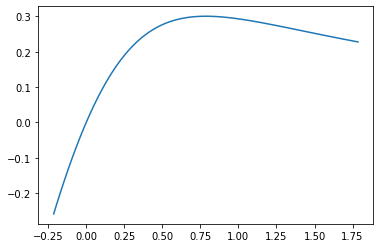

In [7]:
plt.plot(x, [f(_) for _ in x])
plt.show()

#Ejercicio 3
Utilice el método de su preferencia para resolver el siguiente problema:
$min g(x) = e^x - x^3 $

Indique los parámetros de entrada que utilizó y grafique la función $g(x)$ en un intervalo que contenga la solucion óptima.

In [2]:
def g(x):
  return(np.e**x - x**3)
def f1(x):
  global c
  c+=1
  return(np.e**x - 3*(x**2))

In [7]:
def cf1(x):
  global valores_f1
  try:
    return( valores_f1[x])
  except:
    valores_f1[x] = f1(x)
    return( valores_f1[x])

def secante(x_l : float,x_r : float,epsilon: float,f):
  global c, valores_f1
  valores_f1 = {}
  c  = 0
  f1xr=cf1(x_r)
  f1xl=cf1(x_l)
  z = ( x_r - ( (f1xr * (x_r-x_l)) / (f1xr - f1xl) ) )
  f1z  = cf1(z)
  if  (cf1(x_l) * cf1(x_r)) > 0:
      print('Error')
      exit()
  while abs(f1z) > epsilon:
    #print(z)    
    if  (cf1(x_l) * cf1(x_r)) > 0:
      print('Error')
      break
    if f1z < 0:
      x_l = z
      f1xl = f1z
    else:
      x_r  =z
      f1xr = f1z
    z = ( x_r - ( (f1xr * (x_r-x_l)) / (f1xr - f1xl) ) )
    f1z  = cf1(z)
    
  print('({:.3f},{:.3f})\n{}'.format(z,f(z),c))

Escogí utilizar el método de secante, y los parametros que utilicé son $a= 2, b= 5 y epsilon = 0.0001$

In [8]:
a,b,epsilon = 2,5,0.0001
secante(a,b,epsilon,g)

(3.733,-10.216)
38


el punto $x^*$ salió igual a $3.733$, $f(x^*) = -10.216$ y se llamo a la derivada de la función 38 veces.

In [18]:
x = np.linspace(3.733-2,3.733+2,100)

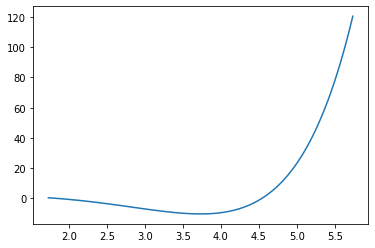

In [19]:
plt.plot(x, [g(_) for _ in x])
plt.show()